In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [250]:
length=10
a=1
Currant=0.7
x_steps_amount=100
t_steps_amount=100
duration=Currant*length*(t_steps_amount-1)/(a*(x_steps_amount-1))
FirstOrder=np.zeros((x_steps_amount,t_steps_amount))
Model=np.zeros((x_steps_amount,t_steps_amount))
TVD=np.zeros((x_steps_amount,t_steps_amount))
start_value=0
start_impulse=1


In [251]:
x_step=length/(x_steps_amount-1)
t_step=duration/(t_steps_amount-1)

In [252]:
Currant=a*t_step/x_step
print(Currant)
if Currant >1 :
    print("Change Currant")

0.7


In [253]:
FirstOrder[:,0]=Model[:,0]=TVD[:,0]=start_value
FirstOrder[0,:]=Model[0,:]=TVD[0,:]=start_impulse
FirstOrder[0][0]=Model[0][0]=TVD[0][0]=start_impulse

In [254]:
#count triangle
for t in range(0,t_steps_amount-1):
    for x in range(1,x_steps_amount):
        #print(Z[x][t]-Currant*(Z[x][t]-Z[x-1][t]))
        FirstOrder[x][t+1]=FirstOrder[x][t]-Currant*(FirstOrder[x][t]-FirstOrder[x-1][t])

In [255]:
#count TVD
e=1e-5
for t in range(0,t_steps_amount-1):
    for x in range(1,x_steps_amount-1):
        r=(TVD[x][t]-TVD[x-1][t]+e)/(TVD[x+1][t]-TVD[x][t]+e)
        #print(r)
        if r>1:
            fi=min(r,2)
        elif r>0:
            fi=min(2*r,1)
        else:
            fi=0
        fplus=0.5*fi*Currant*(1-Currant)*(TVD[x+1][t]-TVD[x][t])
        fminus=0.5*fi*Currant*(1-Currant)*(TVD[x][t]-TVD[x-1][t])
        TVD[x][t+1]=TVD[x][t]-Currant*(TVD[x][t]-TVD[x-1][t])-(fplus-fminus)

In [256]:
#count model
for x in range(0,x_steps_amount-1):
    for t in range(1,t_steps_amount-1):
        if(x*x_step<=a*t*t_step):
            Model[x][t]=start_impulse

In [257]:
def perestroyka(q,i):
    a=[]
    for f in q.tolist():
        a.append(f[i])
    a=np.array(a)
    return a

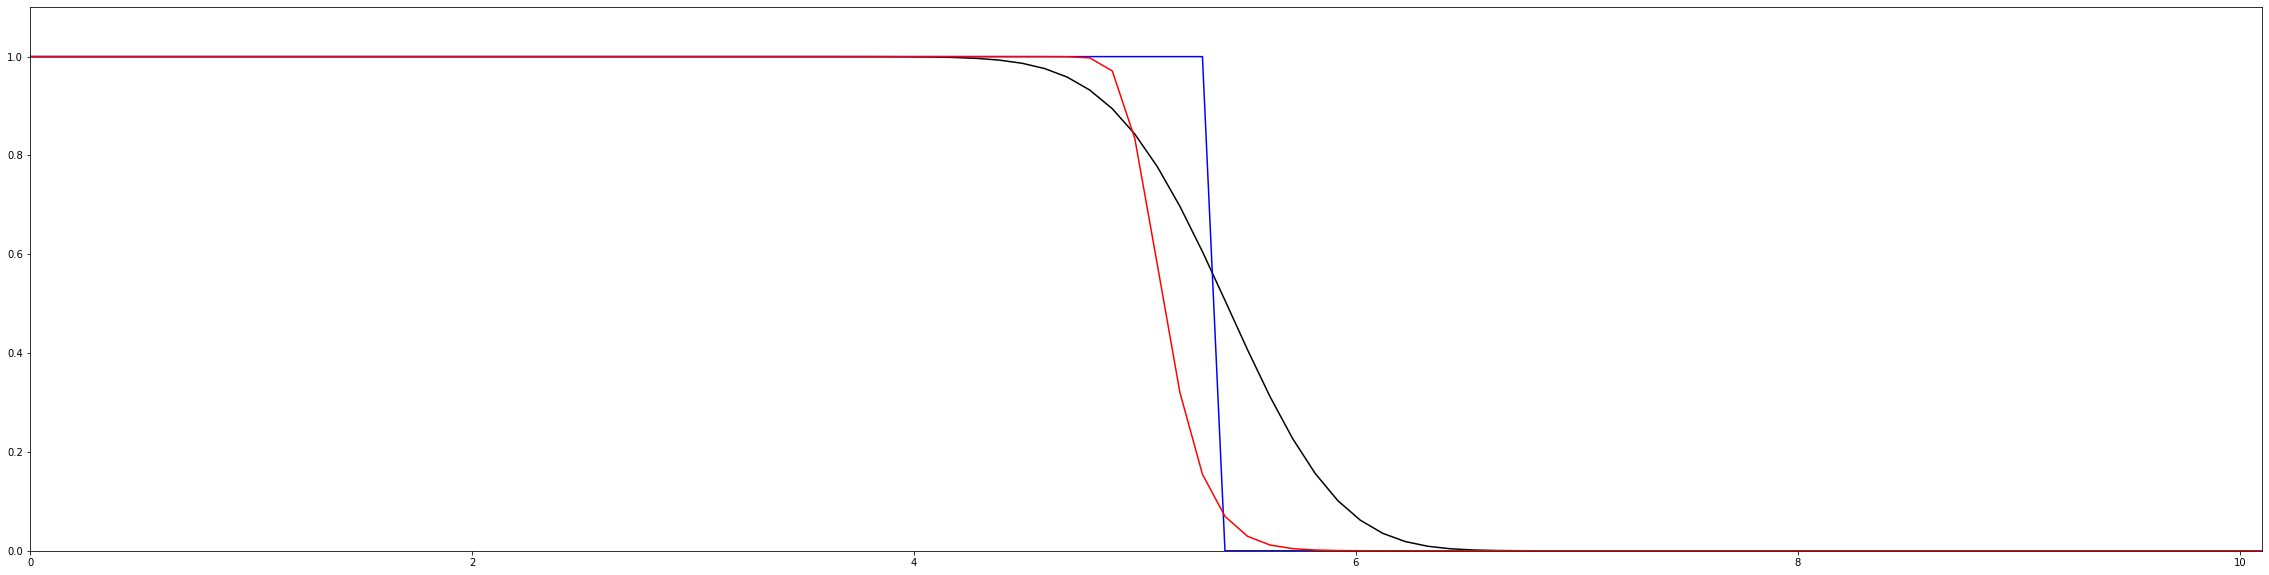

In [258]:
import matplotlib.pyplot as plt
plt.close()
plt.figure(figsize=(40,10))
ax1=plt.subplot(1,1,1)
ax1.set_xlim(0,x_steps_amount*x_step)
ax1.set_ylim(0,1.1)
line0, =ax1.plot(np.linspace(0,x_step*x_steps_amount,x_steps_amount),perestroyka(FirstOrder,75),c='black')
line1, =ax1.plot(np.linspace(0,x_step*x_steps_amount,x_steps_amount),perestroyka(Model,75),c='blue')
line2, =ax1.plot(np.linspace(0,x_step*x_steps_amount,x_steps_amount),perestroyka(TVD,75),c='red')
plt.savefig("linear.png")
plt.show()

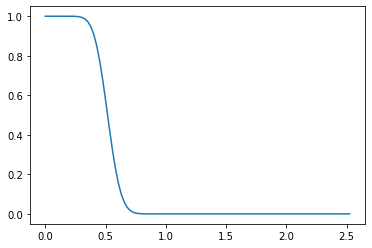

In [160]:
a=[]
for f in FirstOrder.tolist():
    a.append(f[50])
a=np.array(a)
plt.plot(np.linspace(0,x_step*x_steps_amount,x_steps_amount),perestroyka(FirstOrder,50))

In [193]:
print(75*t_step*a)

0.75
